**Loading California Housing Dataset from Sklearn**

In [54]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
housing=fetch_california_housing(as_frame=True)
# print(housing.frame.head())
X_train=housing.data
y_train=housing.target

In [55]:
X_train = X_train.to_numpy()
print(f"X_train_np shape: {X_train.shape}, X_train type:{type(X_train)})")

X_train_np shape: (20640, 8), X_train type:<class 'numpy.ndarray'>)


In [56]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (20640, 8), X Type:<class 'numpy.ndarray'>)
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
y Shape: (20640,), y Type:<class 'pandas.core.series.Series'>)
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [57]:
#Number of features
n_features=X_train.shape[1] # 1 for columns
n_features

b_in=0
import numpy as np
w_in=np.zeros(n_features)
w_in

print(f"w_init shape: {w_in.shape}, b_init type: {type(b_in)}")

w_init shape: (8,), b_init type: <class 'int'>


In [58]:
# def predict_single_loop(x, w, b):
#     """
#     single predict using linear regression

#     Args:
#       x (ndarray): Shape (n,) example with multiple features
#       w (ndarray): Shape (n,) model parameters
#       b (scalar):  model parameter

#     Returns:
#       p (scalar):  prediction
#     """
#     n = x.shape[0]
#     p = 0
#     for i in range(n):
#         p_i = x[i] * w[i]
#         p = p + p_i
#     p = p + b
#     return p
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b
    return p

In [59]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec, w_in, b_in)
print(f"\nf_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (8,), x_vec value: [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]

f_wb shape (), prediction: 0.0


# Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$

In [60]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar
    return cost

In [61]:
# Compute and display cost using our pre-chosen optimal parameters.
cost = compute_cost(X_train, y_train, w_in, b_in)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 2.8052415994936792


# Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [62]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]# YOUR CODE HERE
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [63]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_in, b_in)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -2.0685581690891843
dj_dw at initial w,b: 
 [-9.51510987e+00 -6.07763573e+01 -1.16640064e+01 -2.24299836e+00
 -2.91647064e+03 -6.06734862e+00 -7.33512697e+01  2.47443158e+02]


**Gradient Descent with multiple variables**

In [64]:
import copy, math
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w =   w - alpha * dj_dw
        b =   b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

In [65]:
# initialize parameters
initial_w = np.zeros_like(w_in)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Streaming output truncated to the last 5000 lines.
prediction: 2.20, target value: 4.5
prediction: 2.19, target value: 4.583
prediction: 2.18, target value: 4.2
prediction: 2.21, target value: 2.875
prediction: 2.21, target value: 2.25
prediction: 2.21, target value: 4.0
prediction: 2.22, target value: 2.75
prediction: 2.20, target value: 5.00001
prediction: 2.18, target value: 5.00001
prediction: 2.18, target value: 3.5
prediction: 2.20, target value: 2.25
prediction: 2.19, target value: 0.55
prediction: 2.23, target value: 5.00001
prediction: 2.07, target value: 5.00001
prediction: 2.17, target value: 4.5
prediction: 2.19, target value: 2.375
prediction: 2.19, target value: 5.00001
prediction: 2.24, target value: 2.75
prediction: 2.20, target value: 2.25
prediction: 2.27, target value: 2.25
prediction: 2.05, target value: 5.00001
prediction: 2.07, target value: 5.00001
prediction: 2.13, target value: 5.00001
prediction: 2.19, target value: 5.00001
prediction: 2.17, target value: 5.00

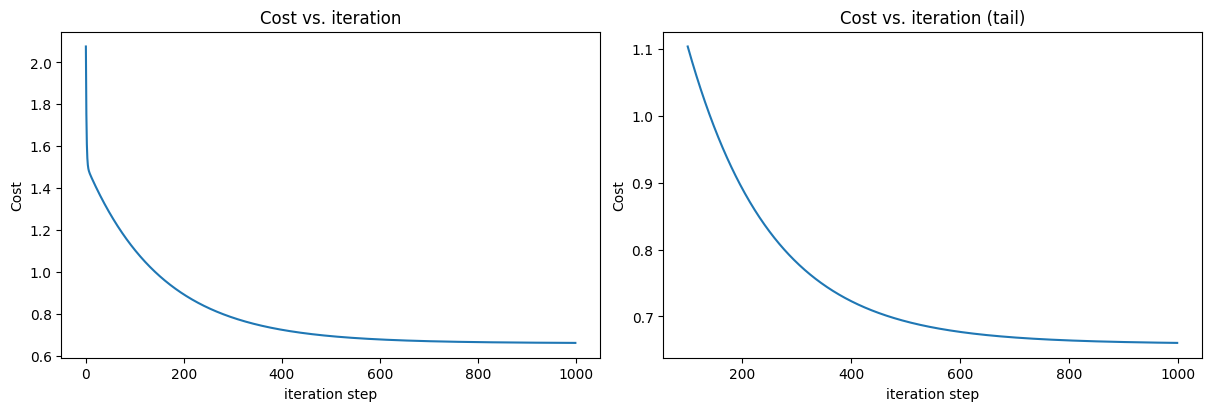

In [66]:
# plot cost versus iteration
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()